# Challenge (2/8): Datos abiertos del Instituto Nacional de Estadística y Geografía (INEGI)

Análisis exploratorio, comencemos con algunas gráficas para datos numéricos.

IMPORTANTE: Toma en cuenta las preguntas que planteaste en el reto anterior. Las variables numéricas involucradas en esas preguntas deberían ser exploradas en este reto con las gráficas propuestas.

In [2]:
# Carga de las librerías a emplear
import numpy as np
import pandas as pd
#Hacer gráficos
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns

2. Carga del dataset

In [3]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [4]:
df=pd.read_csv('/content/drive/MyDrive/Proyecto_Dev.F/data_info_medios_clean.csv')

## 1. Gráficas de distribución

Gráficas sugeridas:
- Histograma
- Distribución de densidad

Completa las siguientes tareas:
1. Selecciona las variables numéricas que consideres relevantes para tus preguntas del primer reto.
2. Construye una gráfica de distribución por cada una de ellas. Recuerda ajustar el número de "cortes" (bins) para observar mejor los valores relevantes en la distribución (solo histogramas).
3. Utiliza el atributo "hue" para que cada histograma represente alguna variable categórica de tu elección.
4. Utiliza el atributo "col" para generar subplots que representen subconjuntos de datos por categoría.

In [ ]:
df['tipoUniEco'].unique()

array(['Fijo', 'Semifijo'], dtype=object)

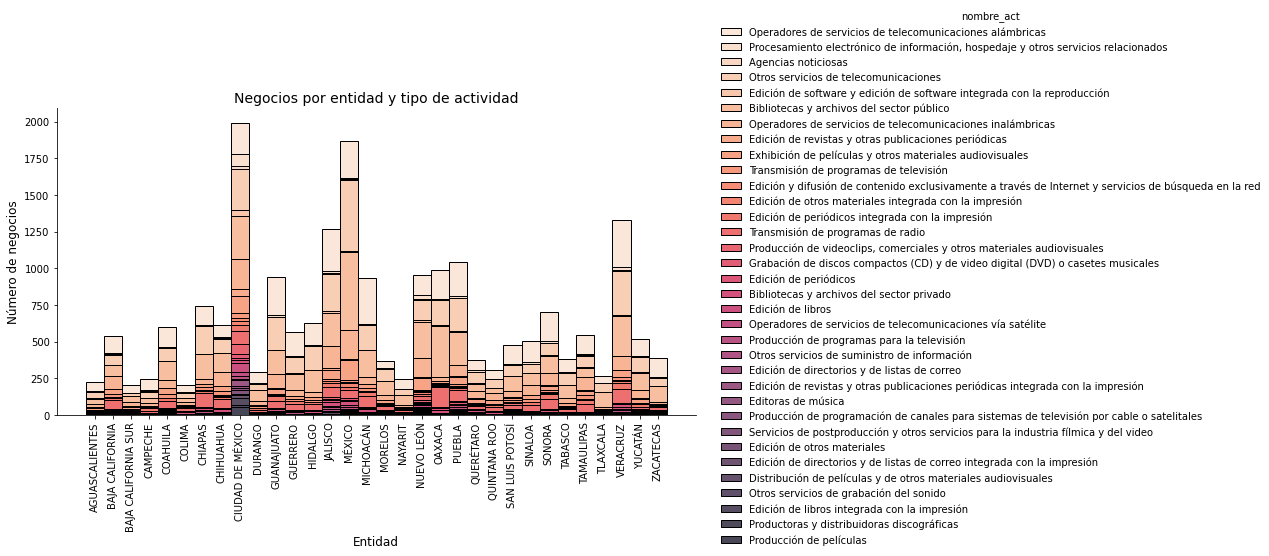

In [5]:
sns.displot(df, x= 'entidad', height= 5, aspect= 2, hue= 'nombre_act', multiple= 'stack', palette='rocket_r')
plt.title('Negocios por entidad y tipo de actividad', fontsize= 14)
plt.xticks(rotation= 90)
plt.xlabel('Entidad', fontsize= 12)
plt.ylabel('Número de negocios', fontsize= 12)
plt.show()

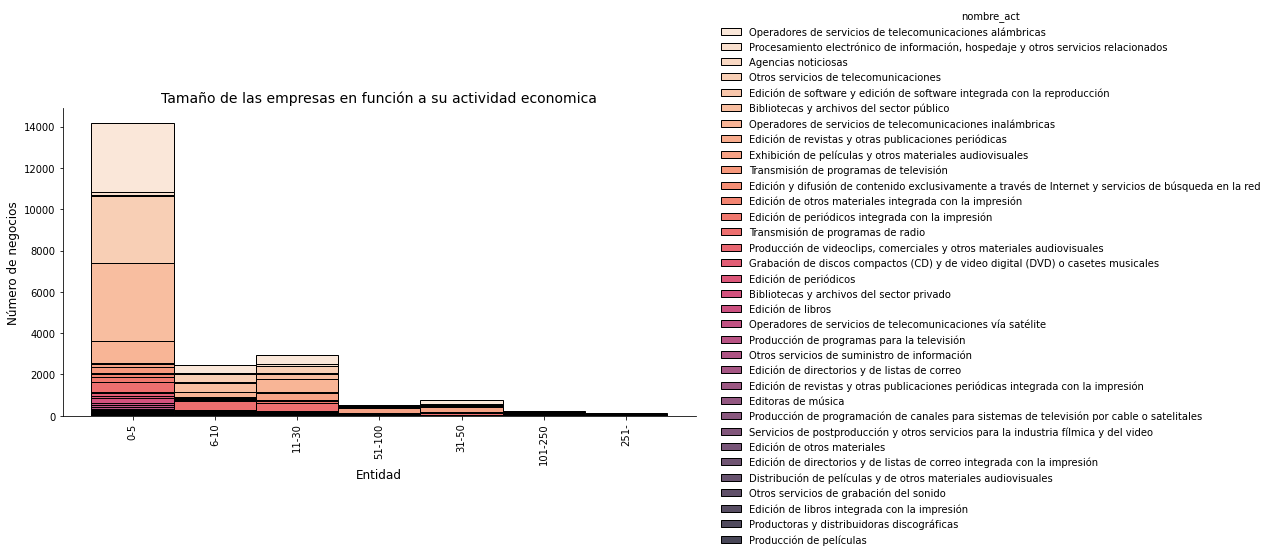

In [6]:
sns.displot(df, x= 'per_ocu', height= 5, aspect= 2, hue= 'nombre_act', multiple= 'stack', palette='rocket_r')
plt.title('Tamaño de las empresas en función a su actividad economica', fontsize= 14)
plt.xticks(rotation= 90)
plt.xlabel('Entidad', fontsize= 12)
plt.ylabel('Número de negocios', fontsize= 12)
plt.show()

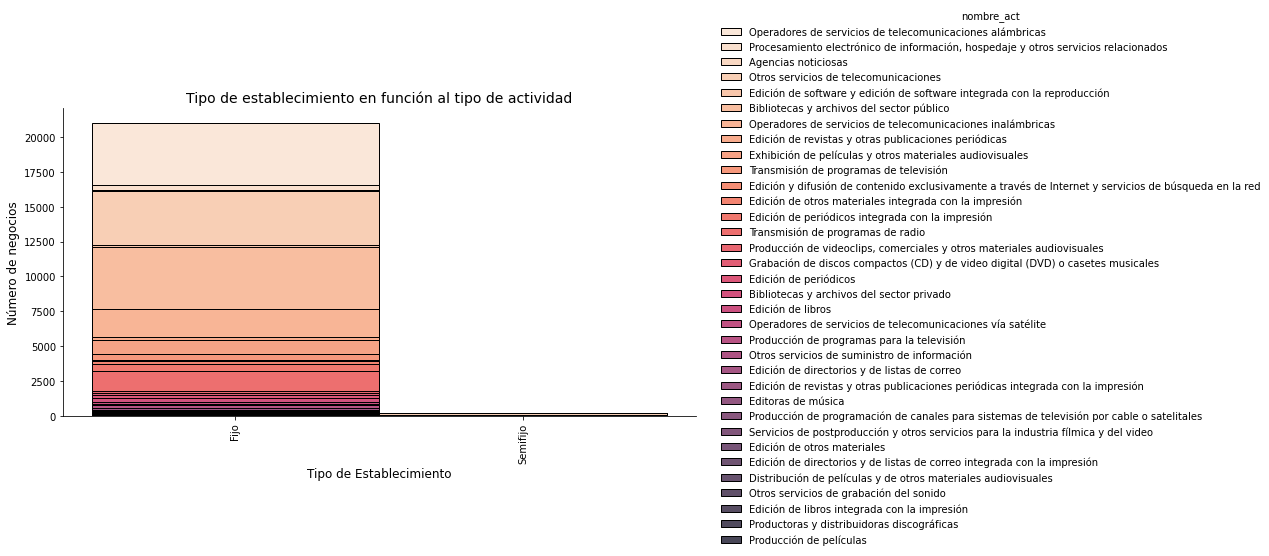

In [7]:
sns.displot(data=df,x='tipoUniEco', hue='nombre_act', palette='rocket_r', height=5, aspect=2,multiple='stack')
plt.title('Tipo de establecimiento en función al tipo de actividad', fontsize= 14)
plt.xticks(rotation= 90)
plt.xlabel('Tipo de Establecimiento', fontsize= 12)
plt.ylabel('Número de negocios', fontsize= 12)
plt.show()

In [ ]:
df[df['raz_social']=='AT&T']['nombre_act'].unique()

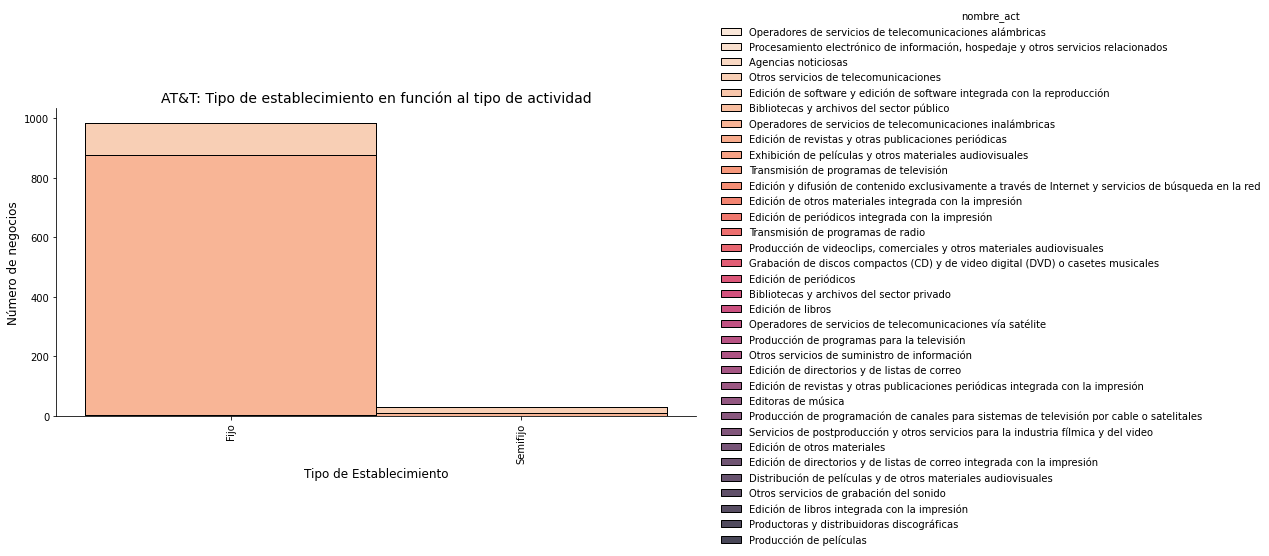

In [92]:
sns.displot(x=df[df['raz_social']=='AT&T']['tipoUniEco'], hue=df['nombre_act'], palette='rocket_r', height=5, aspect=2,multiple='stack')
plt.title('AT&T: Tipo de establecimiento en función al tipo de actividad', fontsize= 14)
plt.xticks(rotation= 90)
plt.xlabel('Tipo de Establecimiento', fontsize= 12)
plt.ylabel('Número de negocios', fontsize= 12)
plt.show()

## 2. Gráficas de dispersión

- Scatter plot
- Pairplot
- Displot en su modalidad tipo heatmap

Text(0.5, 1.0, 'Tamaño de la empresa por año')

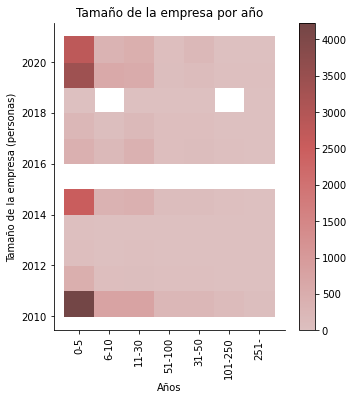

In [88]:
sns.displot(df, y='fecha_alta', x='per_ocu', binwidth=(30,1), cbar=True, color='#CD5C5C')
plt.xticks(rotation= 90)
plt.ylabel('Tamaño de la empresa (personas)')
plt.xlabel('Años')
plt.title('Tamaño de la empresa por año')

## 3. Serie de tiempo

Una serie de tiempo no es más que el cambio de una variable numérica a través de una variable temporal. Ya que cuentas con ambas, construyamos una de estas series.

Completa las siguientes tareas:
- Construye una serie de tiempo haciendo uso de la columna de fechas de tu conjunto de datos y alguna de las variables numéricas de tu interés.
- Realiza tantas series como creas conveniente para responder tus preguntas y saciar tu curiosidad 😉

In [ ]:
#sns.lineplot( x=df['fecha_alta'], y=df['raz_social']

In [49]:
year=pd.DataFrame(df['fecha_alta'].value_counts()).reset_index()
year

,index,fecha_alta
0,2010,6453
1,2019,4802
2,2020,3697
3,2014,3547
4,2016,1163
5,2017,598
6,2011,594
7,2021,186
8,2012,113
9,2013,56


Text(-2.450000000000003, 0.5, 'Número de empresas')

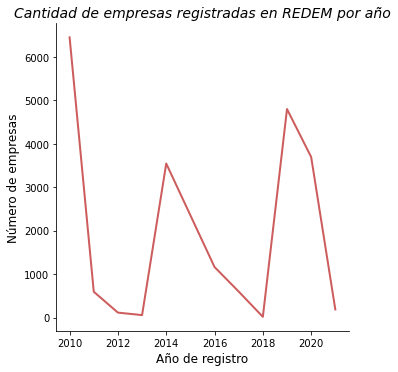

In [67]:
sns.relplot(data=year, x='index',y='fecha_alta',kind='line', color='#CD5C5C',linewidth=2)
plt.title('Cantidad de empresas registradas en REDEM por año', fontsize=14, style='italic')
plt.xlabel('Año de registro', fontsize=12)
plt.ylabel('Número de empresas', fontsize=12)

In [79]:
razon=pd.pivot_table(data=df, index=['raz_social','fecha_alta'], aggfunc='count').reset_index()
razon[razon['raz_social']=='AT&T']

,raz_social,fecha_alta,Unnamed: 0,ageb,clee,cod_postal,codigo_act,correoelec,cve_ent,cve_loc,...,per_ocu,telefono,tipoCenCom,tipoUniEco,tipo_asent,tipo_v_e_1,tipo_v_e_2,tipo_v_e_3,tipo_vial,www
222,AT&T,2010,47,47,47,38,47,47,47,47,...,47,47,11,47,41,41,41,41,34,47
223,AT&T,2011,9,9,9,8,9,9,9,9,...,9,9,3,9,9,9,9,9,7,9
224,AT&T,2012,2,2,2,1,2,2,2,2,...,2,2,0,2,2,2,2,2,2,2
225,AT&T,2014,47,47,47,41,47,47,47,47,...,47,47,19,47,44,44,44,44,38,47
226,AT&T,2016,264,264,264,214,264,264,264,264,...,264,264,114,264,219,218,218,218,162,264
227,AT&T,2017,14,14,14,13,14,14,14,14,...,14,14,0,14,13,13,13,13,11,14
228,AT&T,2019,49,49,49,49,49,49,49,49,...,49,49,18,49,49,49,49,49,49,49
229,AT&T,2020,581,581,581,579,581,581,581,581,...,581,581,505,581,579,579,579,579,538,581


Text(3.799999999999997, 0.5, 'Empresas')

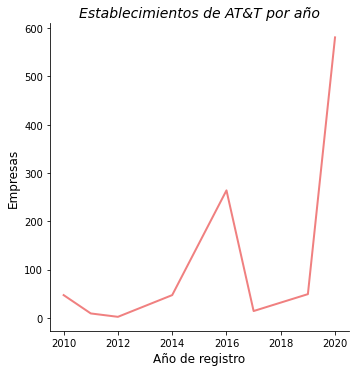

In [86]:
sns.relplot(x=razon['fecha_alta'], y=razon[razon['raz_social']=='AT&T']['clee'], kind='line', color='#F08080',linewidth=2)
plt.title('Establecimientos de AT&T por año', fontsize=14, style='italic')
plt.xlabel('Año de registro', fontsize=12)
plt.ylabel('Empresas', fontsize=12)